#### Coding RELU 

In [23]:
import numpy as np 

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0,inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [24]:
class ActivationReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [25]:
inputs = np.array([0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100])

obj = ActivationReLU()
obj.forward(inputs)
obj.output

array([0. , 2. , 0. , 3.3, 0. , 1.1, 2.2, 0. ])

#### Coding SoftMax 

In [26]:
inputs =[[1, 2, 3, 2.5],
         [2., 5., -1., 2],
         [-1.5, 2.7, 3.3, -0.8]]

# Get unnormalized probabilities
exp_values = np.exp(inputs - np.max(inputs,axis = 1,keepdims = True))

# Normalize them for each sample
probabilities = exp_values/np.sum(exp_values,axis = 1,keepdims = True)
print(probabilities)
np.sum(probabilities, axis = 1,keepdims = True)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([[1.],
       [1.],
       [1.]])

In [27]:
class ActivationSoftMax:
    #forward pass
    def forward(self,inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis = 1,keepdims = True))
        
        probabilities = exp_values/np.sum(exp_values,axis = 1 ,keepdims = True)
        self.output = probabilities

In [28]:
class Layer_Dense:
    #Layer initialization 
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.01*np.random.rand(n_inputs,n_neurons) # initialise random value of gussain distribution of mean "0" and var "1"
        self.biases = np.zeros((1,n_neurons))
    #forward pass 
    def forwardpass(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases

In [29]:
from nnfs.datasets import spiral_data
import nnfs
nnfs.init()
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3) # this will have 2 input into 3 output feature(1st Dense layer)

activation1 = ActivationReLU() # here we are using ReLU activation function for the first layer

dense2 = Layer_Dense(3,3) # created 2nd Dense Layer with 3 input features(output of the previous) and 3 output

activation2 = ActivationSoftMax() # created softmax activation used for 2nd layer 

dense1.forwardpass(X) # Make a forward pass of our training data through this layer

activation1.forward(dense1.output) # now this output is input for next neurons

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forwardpass(activation1.output)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333325 0.33333355 0.33333322]
 [0.33333313 0.33333373 0.3333331 ]
 [0.3333331  0.3333337  0.33333322]
 [0.333333   0.33333385 0.3333331 ]]


In [30]:
scores = [1.0, 2.0, 3.0]
s_array = np.array(scores)
type(s_array)
print(s_array.shape)

(3,)


#### Coding Cross Entropy Loss

#####  When the Class Target is number 

In [31]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])
    
class_targets = np.array([0, 1, 1])


for targ_idx,distribution in zip(class_targets,softmax_outputs):
    print(distribution[targ_idx])

0.7
0.5
0.9


In [32]:
# OR
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])
    
class_targets = np.array([0, 1, 1])

print(softmax_outputs[[0,1,2],class_targets])
# most optimised
print(softmax_outputs[range(len(softmax_outputs)),class_targets])

[0.7 0.5 0.9]
[0.7 0.5 0.9]


In [33]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])) # this will give me the loss

neg_loss = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])

avg_loss  = np.mean(neg_loss)
print(avg_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


##### When the class target is one hot encoded 

In [34]:
y_true_check = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]])

y_pred_clipped_check = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])

y_true_check*y_pred_clipped_check # here we are doing element wise multiplication 

array([[0.7, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.9, 0. ]])

In [35]:
A = y_true_check*y_pred_clipped_check
B = np.sum(A,axis = 1)
C = -np.log(B)
print(C)
print(np.mean(C)) # this is the avg loss

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


### Coding Categorical Cross Entropy Class 

In [36]:
#common loss class 
class Loss:
    #calculate the data and regularization losses 
    #given model output and growth truth values
    def calculate(self,output,y):
        #calculate the sample losses
        sample_losses = self.forward(output,y)
        #calculate the mean loss
        data_loss = np.mean(sample_losses)
        
        return data_loss

In [37]:
class Loss_CategoricalCrossentropy(Loss):
    #forward pass
    def forward(self,y_pred,y_true):
        samples = len(y_pred)
        #clip data to prevent divison by 0
        #clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7)
        
        if len(y_true.shape) == 1: # only if categorical label(class targets are just numbers)
            correct_confidence = y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped*y_true,axis=1)
            
        negative_log_likelihoods = -np.log(correct_confidence)
        return negative_log_likelihoods

In [38]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])
    
class_targets = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs,class_targets)
print(loss)

0.38506088005216804


#### Full code upto this point 

In [39]:
#create dataset
X,y = spiral_data(samples = 100,classes = 3)

dense1 = Layer_Dense(2,3)

activation1 = ActivationReLU()

dense2 = Layer_Dense(3,3)

activation2 = ActivationSoftMax()

loss_function = Loss_CategoricalCrossentropy()

dense1.forwardpass(X)
activation1.forward(dense1.output)

dense2.forwardpass(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

loss = loss_function.calculate(activation2.output,y)
print('loss :', loss)

predictions = np.argmax(activation2.output,axis = 1)
if len(y.shape)==2:
    y = np.argmax(y,axis=1)

accuracy = np.mean(predictions==y)
print('acc :',accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333333  0.33333328 0.3333334 ]
 [0.33333325 0.3333332  0.33333355]
 [0.3333333  0.33333322 0.3333335 ]
 [0.33333322 0.33333308 0.33333367]]
loss : 1.098613
acc : 0.2866666666666667


#### Introducing Accuracy 

In [40]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])
    
class_targets = np.array([0, 1, 1]) # this is ground truth

# Now check the predictions(we can do this when class target is number) 
predictions = np.argmax(softmax_outputs,axis=1)

#when the class target is one hot encoded 
if len(class_targets.shape)==2:
    predictions = np.argmax(softmax_outputs,axis = 1)
    
accuracy = np.mean(predictions == class_targets)
print('acc :',accuracy)

acc : 1.0


### The Need for Optimization

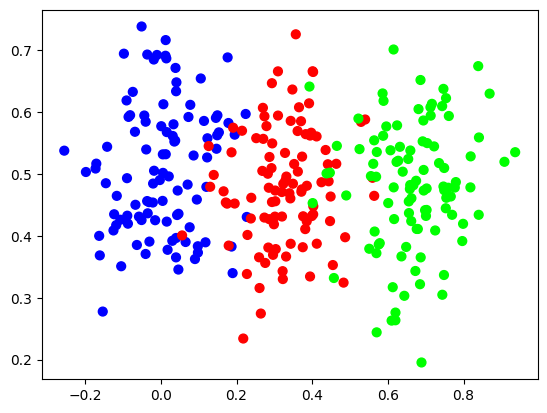

In [41]:
#SIMPLER DATASET
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

#### Randomly select weights and biases 
pick weights and biases randomly then calculate loss then
iterate and choose weights and bias which gives lowest loss
(this does not work)

In [44]:
X,y = vertical_data(samples = 100,classes = 3)

dense1 = Layer_Dense(2,3)
activation1 = ActivationReLU()
dense2 = Layer_Dense(3,3)
activation2 = ActivationSoftMax()

loss_function = Loss_CategoricalCrossentropy()


lowest_loss = 9999999 #take a larger loss to minimise 
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    
    dense1.weights = 0.05*np.random.randn(2,3)
    dense1.biases = 0.05*np.random.randn(1,3)
    dense2.weights = 0.05*np.random.randn(3,3)
    dense2.biases = 0.05*np.random.randn(1,3)
    
    #perform forward pass through activaton function 
    dense1.forwardpass(X)
    activation1.forward(dense1.output)
    dense2.forwardpass(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output,y)
    
    predictions = np.argmax(activation2.output,axis = 1)
    accuracy = np.mean(predictions == y)
    
    if loss<lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0986761 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 1.0985732 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0983825 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0978681 acc: 0.3333333333333333
New set of weights found, iteration: 133 loss: 1.0978147 acc: 0.3333333333333333
New set of weights found, iteration: 159 loss: 1.0976804 acc: 0.3333333333333333
New set of weights found, iteration: 429 loss: 1.0975919 acc: 0.3333333333333333
New set of weights found, iteration: 509 loss: 1.0972099 acc: 0.3333333333333333
New set of weights found, iteration: 2251 loss: 1.0967957 acc: 0.3333333333333333
New set of weights found, iteration: 2984 loss: 1.096694 acc: 0.3333333333333333
New set of weights found, iteration: 6682 loss: 1.0966797 acc: 0.3333333333333333
New set of weights found, iteration: 7184 loss: 1.0965178 acc: 0.3333333333333333
New set of weights found, itera

#### Randomly adjust weights and biases
 if loss decreases for some W,b: then choose the next value weights, biases closer to the W,b values 
 and if loss increases, don't update weights,biases values
 (this works better but fails for complex data)

In [48]:
X,y = vertical_data(samples = 100,classes = 3)

dense1 = Layer_Dense(2,3)
activation1 = ActivationReLU()
dense2 = Layer_Dense(3,3)
activation2 = ActivationSoftMax()

loss_function = Loss_CategoricalCrossentropy()


lowest_loss = 9999999 #take a larger loss to minimise 
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.biases += 0.05*np.random.randn(1,3)
    
    #perform forward pass through activaton function 
    dense1.forwardpass(X)
    activation1.forward(dense1.output)
    dense2.forwardpass(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output,y)
    
    predictions = np.argmax(activation2.output,axis = 1)
    accuracy = np.mean(predictions == y)
    
    if loss<lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1009043 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.1005286 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0986472 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.09665 acc: 0.3333333333333333
New set of weights found, iteration: 16 loss: 1.0936426 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.092058 acc: 0.37
New set of weights found, iteration: 22 loss: 1.0920577 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0880307 acc: 0.5933333333333334
New set of weights found, iteration: 28 loss: 1.0822498 acc: 0.5933333333333334
New set of weights found, iteration: 29 loss: 1.0795944 acc: 0.62
New set of weights found, iteration: 30 loss: 1.0771602 acc: 0.3333333333333333
New set of weights found, iteration: 39 loss: 1.0760651 acc: 0.3433333333333333
New set of weights found, iteration: 41 loss: 1.0758691 acc: 0.6666666666

New set of weights found, iteration: 494 loss: 0.41889063 acc: 0.9033333333333333
New set of weights found, iteration: 501 loss: 0.41820547 acc: 0.8966666666666666
New set of weights found, iteration: 502 loss: 0.41725704 acc: 0.9033333333333333
New set of weights found, iteration: 505 loss: 0.41672993 acc: 0.9066666666666666
New set of weights found, iteration: 508 loss: 0.4140419 acc: 0.91
New set of weights found, iteration: 512 loss: 0.41275844 acc: 0.9133333333333333
New set of weights found, iteration: 513 loss: 0.4033932 acc: 0.9066666666666666
New set of weights found, iteration: 519 loss: 0.40067017 acc: 0.8966666666666666
New set of weights found, iteration: 521 loss: 0.39605948 acc: 0.9133333333333333
New set of weights found, iteration: 524 loss: 0.39025992 acc: 0.9233333333333333
New set of weights found, iteration: 531 loss: 0.384466 acc: 0.9233333333333333
New set of weights found, iteration: 532 loss: 0.38349554 acc: 0.9166666666666666
New set of weights found, iteratio

New set of weights found, iteration: 1158 loss: 0.18148555 acc: 0.92
New set of weights found, iteration: 1163 loss: 0.18132156 acc: 0.93
New set of weights found, iteration: 1166 loss: 0.18021365 acc: 0.92
New set of weights found, iteration: 1187 loss: 0.18014713 acc: 0.92
New set of weights found, iteration: 1190 loss: 0.18001658 acc: 0.9166666666666666
New set of weights found, iteration: 1194 loss: 0.17915201 acc: 0.92
New set of weights found, iteration: 1203 loss: 0.17894568 acc: 0.91
New set of weights found, iteration: 1205 loss: 0.17870161 acc: 0.9133333333333333
New set of weights found, iteration: 1209 loss: 0.17831378 acc: 0.9166666666666666
New set of weights found, iteration: 1213 loss: 0.17796837 acc: 0.9233333333333333
New set of weights found, iteration: 1222 loss: 0.17772204 acc: 0.9233333333333333
New set of weights found, iteration: 1242 loss: 0.17708845 acc: 0.92
New set of weights found, iteration: 1243 loss: 0.17694613 acc: 0.92
New set of weights found, iterati

In [50]:
X,y = spiral_data(samples = 100,classes = 3)

dense1 = Layer_Dense(2,3)
activation1 = ActivationReLU()
dense2 = Layer_Dense(3,3)
activation2 = ActivationSoftMax()

loss_function = Loss_CategoricalCrossentropy()


lowest_loss = 9999999 #take a larger loss to minimise 
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.biases += 0.05*np.random.randn(1,3)
    
    #perform forward pass through activaton function 
    dense1.forwardpass(X)
    activation1.forward(dense1.output)
    dense2.forwardpass(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output,y)
    
    predictions = np.argmax(activation2.output,axis = 1)
    accuracy = np.mean(predictions == y)
    
    if loss<lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.099033 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0986236 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.098027 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0978425 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.0975889 acc: 0.33666666666666667
New set of weights found, iteration: 13 loss: 1.0960252 acc: 0.38333333333333336
New set of weights found, iteration: 15 loss: 1.0953746 acc: 0.38333333333333336
New set of weights found, iteration: 23 loss: 1.0953611 acc: 0.37
New set of weights found, iteration: 25 loss: 1.0950634 acc: 0.37
New set of weights found, iteration: 26 loss: 1.0950321 acc: 0.32
New set of weights found, iteration: 29 loss: 1.0950012 acc: 0.37333333333333335
New set of weights found, iteration: 35 loss: 1.0946574 acc: 0.37666666666666665
New set of weights found, iteration: 42 loss: 1.093805 acc: 0.3466666666666667
New

New set of weights found, iteration: 95171 loss: 1.0658326 acc: 0.44
